# Barplot: Barras, barras e mais barras!

Nessa aula além vamos nos aprofundar em como criar e usar gráficos de barra. Além disso, vamos começar a explorar a customização de alguns aspectos do gráfico através dos argumento que podemos passar para as funções do seaborn.

## 1. Barplots

Nesta aula, vamos criar nossos gráficos usando a função `sns.barplot()`. Vamos continuar trabalhando com gráficos de barras, mas agora com uma outra função da mesma biblioca, e que nos permite fazer mais do que uma simples contagem. Gráficos de barra são muito utéis pois são fáceis de interpretar e podem ser usados para comparar diferentes categorias de uma variável categórica, uma tarefa muito comum.

Antes de partirmos para a criação do gráfico propriamente dita, vamos repetir algumas linhas de código que já vimos anteriormente, que servem para carregar as bibliotecas necessárias e a nossa base de dados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cartoes = pd.read_csv("https://bit.ly/dados_cartoes")
cartoes.head(5)

,data_pgto,ano,mes,forma_pagamento,valor,tipo_despesa,nome_fornecedor,cpf_servidor,mandato,posicao_mandato
0,2003-01-02,2003,1,Débito,1696.90,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
1,2003-01-02,2003,1,Débito,1336.60,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
2,2003-01-02,2003,1,Débito,1396.43,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.868.251-**,Lula (1º Mandato),1
3,2003-01-03,2003,1,Débito,105.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,SEBASTIO ALVES DE SOUSA - ME,***.262.328-**,Lula (1º Mandato),1
4,2003-01-03,2003,1,Débito,200.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,JOÃO LEITE NETO - ME - JLN ELETRONICOS,***.262.328-**,Lula (1º Mandato),1


# Gráficos de barra realizando agregação de dados

Como a biblioteca `seaborn` tem o objetivo de simplificar nossa tarefa de criação de gráficos, ela já possui funções que realizam a agregação de dados automaticamente. Isso significa que, ainda que passemos dados em que a unidade de análise não é a mesma que a desejada para o gráfico (categoria sendo representada), a função `barplot()` já realiza automaticamente a tarefa de agregar valores numéricos.

No entanto, é importante termos consciência de como essa função funciona, qual seu valor padrão e como podemos alterá-lo. Para isso, vamos criar um gráfico de barras simples, passando nosso conjunto de dados e relacionando as variáveis "mandato" e "valor".

Obs: Em versões antigas do `seaborn`, a função `barplot()` poderá gerar por padrão gráficos com múltiplas cores.

<Axes: xlabel='valor', ylabel='mandato'>

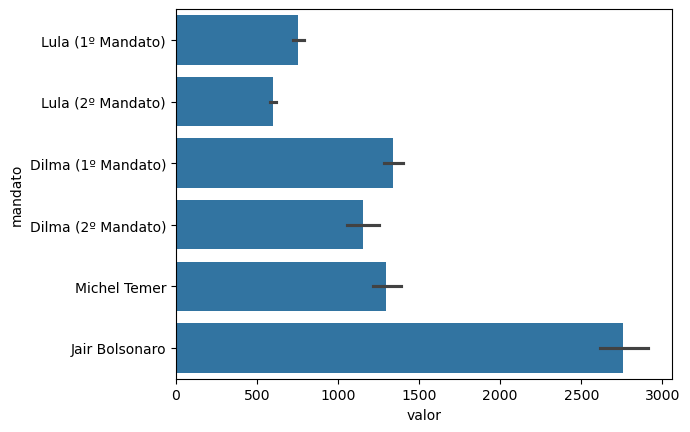

In [2]:
sns.barplot(
    y="mandato",
    x="valor",
    data=cartoes,
)

O que está acontecendo com esse gráfico? Por que há uma linha no meio das barras criadas?

Como cada categoria de `"mandato"` aparece em múltiplas linhas, a função `barplot()` está realizando a média dos valores da variável `"valor"`, para cada categoria. Esse é o modo padrão de agregação da função. Como há multiplas observações para cada categoria sendo representada, essa função é aplicada para que seja criada uma única barra. 

[Podemos conferir essas informações na documentação da função: https://seaborn.pydata.org/generated/seaborn.barplot.html](https://seaborn.pydata.org/generated/seaborn.barplot.html). A primeira informação da documentação consiste justamente em uma linha de código que nos mostra todas os argumentos (opções disponíveis) para essa função, cada um acompanhado de seu respectivo valor padrão. Estamos preocupados, neste momento, com os argumentos `estimator` e `errorbar`. 

O primeiro argumento (`estimator`) indica qual função será aplicada aos dados para realizar a agregação da variável numérica. O valor padrão desse argumento (`estimator="mean"`) indica que será calculada a média da variável numérica para cada categoria. Ou seja, em nosso exemplo estamos calculando o valor médio dos pagamentos realizados em cada mandato.

O segundo argumento que vamos analisar (`errorbar`) indica se queremos ou não adicionar barras de erro ao gráfico e especifica também como essa barra será criada. O valor padrão  desse argumento (`errorbar=('ci', 95)`) indica que a barra irá representar um intervalo de confiança de 95%. 

Não precisamos nos preocupar com o significado exato desse intervalo, mas é importante saber que uma medida do erro do valor médio está sendo estimada. Isso não se aplica ao nosso caso porque temos o valor de todas as transações, não uma amostra.

Vamos remover a barra mudando o valor desse argumento.


<Axes: xlabel='valor', ylabel='mandato'>

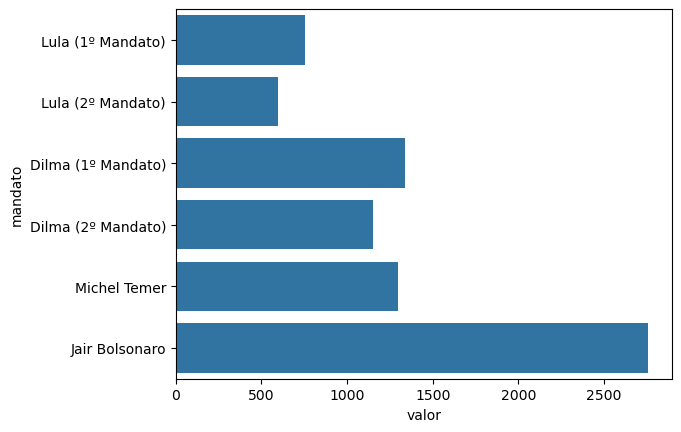

In [3]:
sns.barplot(
    y="mandato",
    x="valor",
    errorbar=None,
    data=cartoes,
)

A partir daqui vamos fazer todos os gráficos com a opção de `errorbar=None` (importante que o N seja maiúsculo!).

Vamos agora incluir mais uma variável categórica em nossa análise. Vamos calcular o valor médio dos pagamentos feitos em crédito e em débito, em cada mandato. Para tanto, basta utilizar novamente o argumento `hue`, indicando que queremos cores diferentes de barras para cada categoria da coluna `forma_pagamento`.

<Axes: xlabel='valor', ylabel='mandato'>

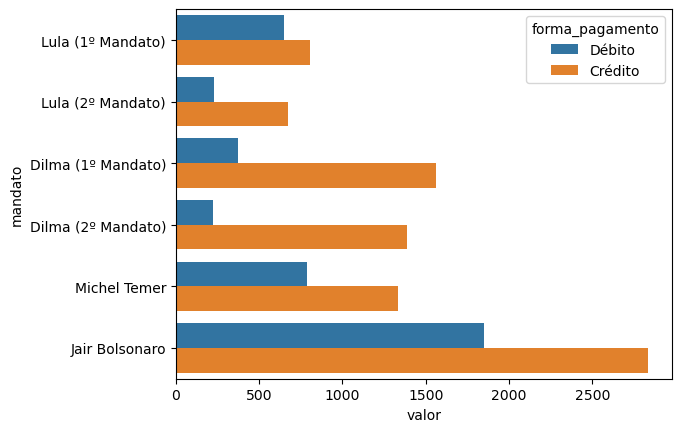

In [4]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    errorbar=None,
    data=cartoes,
)

Agora, em vez de calcular o valor médio vamos calcular o gasto total em cada mandato. Para isso, vamos mudar a função de agregação. Se por padrão a função de agregação utilizada é a média (`estimator="mean"`), queremos agora usar a soma (`estimator="sum"`) para obter o valor total dos pagamentos realizados em cada mandato.

<Axes: xlabel='valor', ylabel='mandato'>

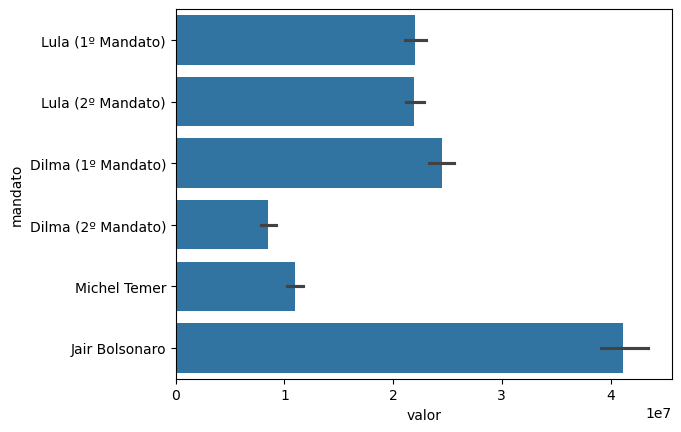

In [5]:
sns.barplot(
    y="mandato",
    x="valor",
    estimator="sum",
    data=cartoes,
)

**Desafio**: Remova a barra de erro do gráfico com a soma dos gastos por mandato.

Um elemento importante a se notar é que há uma informação importante no eixo Y. A indicação "1e7" significa que o eixo Y está em notação científica. Isso acontece porque os valores são muito grandes. Vamos ignorar esse detalhe por enquanto, mas ao longo do curso vamos ver formas de alterar esse comportamento.

Em nosso caso específico, isso significa que os valores do eixo Y no gráfico estão em dezenas de milhões de reais (10^7). Infelizmente, por enquanto vamos deixar o gráfico com essa apresentação estranha.

Vamos repetir o gráfico novamente distinguindo a forma de pagamento:

<Axes: xlabel='valor', ylabel='mandato'>

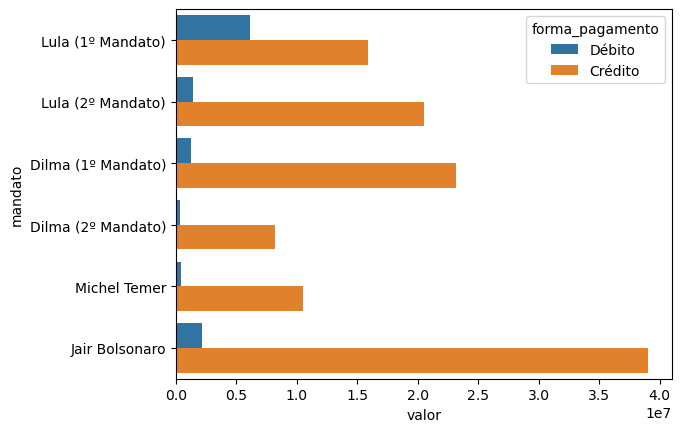

In [6]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    estimator="sum",
    errorbar=None,
    data=cartoes,
)

Apesar de o ano ser uma variável numérica, podemos pensar nele como uma categoria. Com isso, tratamos cada ano como um conjunto totalmente diferente, e calculamos os gastos em cada ano.

Obs: Em versões anteriores do seaborn onde as barras são coloridas esse gráfico ficará especialmente estranho devido ao número de categorias.

<Axes: xlabel='ano', ylabel='valor'>

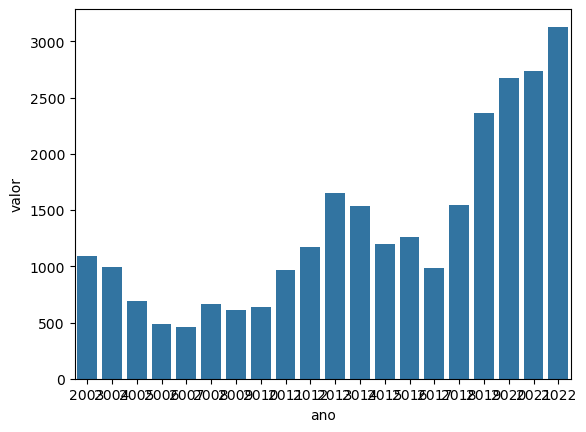

In [7]:
sns.barplot(
    x="ano",
    y="valor",
    errorbar=None,
    data=cartoes,
)

Inverta os gráficos do gráfico, colocando os anos no eixo Y:

Há uma convenção de representar ap assagem de tempo no Eixo X. Assim, gráficos que tem uma relação forte com a progressão temporal ficam estranhos se isso for representado no eixo Y.

Poderíamos tornar os nomes (labels) do eixo X legíveis com algumas outras estratégias, além de inverter os eixos. Por exemplo, rotacionar os labels para não se sobreporem (e.g. escritos na vertical); se tratando de anos, podemos pular alguns já que sabemos que avançamos um ano em cada barra; ou ainda podemos aumentar a largura do gráfico. Vamos começar a ver isso na próxima aula, mas vamos ver um exemplo já com nosso gráfico por ano.

<Axes: xlabel='ano', ylabel='valor'>

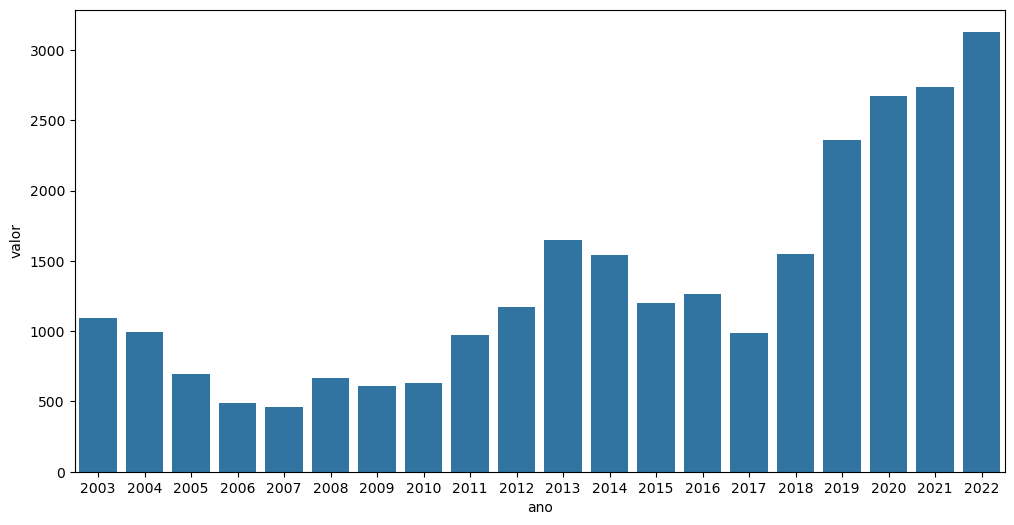

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    x="ano",
    y="valor",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

# Controlando a cor dos gráficos

Para ajustar a cor desejada dos gráficos no seaborn, 2 argumentos podem ser utilizados:  `color` e `palette`.

Quando queremos usar uma mesma cor para todo o gráfico (quando não usamos a codificação de cor pelo argumento `hue`), indicamos a cor desejada com o argumento `color`.

Vamos usar 2 meios para escolher as cores que desejamos utilizar em nossos gráficos. O primeira consiste em usar o nome da cor. Contudo, o seaborn não aceita qualquer nome de cor (ele não pode imaginar a cor, como nós faríamos). Assim, há um conjunto pré-determinado e limitado de cores que podemos indicar pelo nome (assim como passamos o nome de colunas, usando aspas). Uma listagem completa dos nomes de cores aceitos pelo seaborn pode ser encontrada na documentação do matplotlib: [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)

Vamos destacar aqui a lista de cores mais longa, com um grande número de variações:

<img src="https://lthevenard.github.io/curso_prog/assets/imagens/color_matplot_allcolors.png" alt="Color names" style="width: 800px;"/>

E também um outro conjunto de cores que replicam a paleta de cores do programa Tableau:

<img src="https://lthevenard.github.io/curso_prog/assets/imagens/color_matplot_tableau.png" alt="Tableau colors" style="width: 800px;"/>

Para usar essas cores, basta passar o nome da cor como uma string (ou seja, entre aspas) para o argumento `color`. Vamos ajustar nosso gráfico por mandato usando esse argumento:

<Axes: xlabel='valor', ylabel='mandato'>

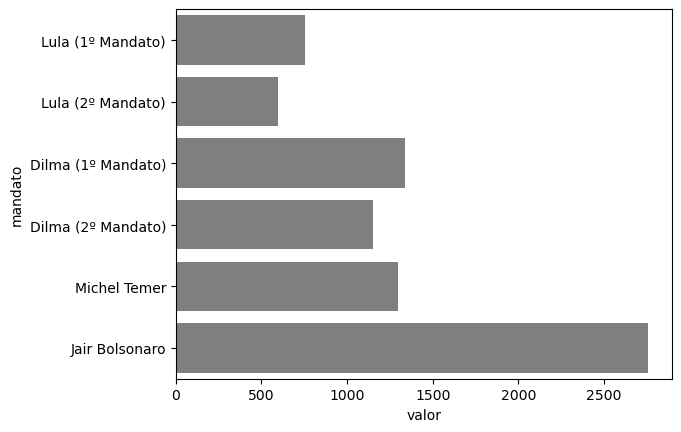

In [9]:
sns.barplot(
    y="mandato",
    x="valor",
    color="tab:gray",
    estimator="mean",  # essa linha é opcional
    errorbar=None,
    data=cartoes,
)

Podemos também usar o código hexadecimal da cor que desejamos. O código hexadecimal é uma forma de representar cores que é comumente usada em design, e suportada também por linguagens de programação. Ele é composto por 6 caracteres, que podem ser números de 0 a 9 ou letras de A a F, e podemos escolher a cor que desejamos com precisão através de várias ferramentas existentes.

Por exemplo, no próprio Google Search podemos pesquisar por "color picker" e escolher a cor que desejamos, ou acessar o link: [https://g.co/kgs/hJsq1Hd](https://g.co/kgs/hJsq1Hd). O código hexadecimal da cor escolhida é exibido na tela na caixa `HEX`.

Se quisermos usar essa forma de referenciar uma cor, em vez de passar o nome da cor basta passar o código hexadecimal como uma string (entre aspas) para o argumento `color`. Vamos ajustar nosso gráfico alterando a cor das barras para um tom específico de azul.

<Axes: xlabel='valor', ylabel='mandato'>

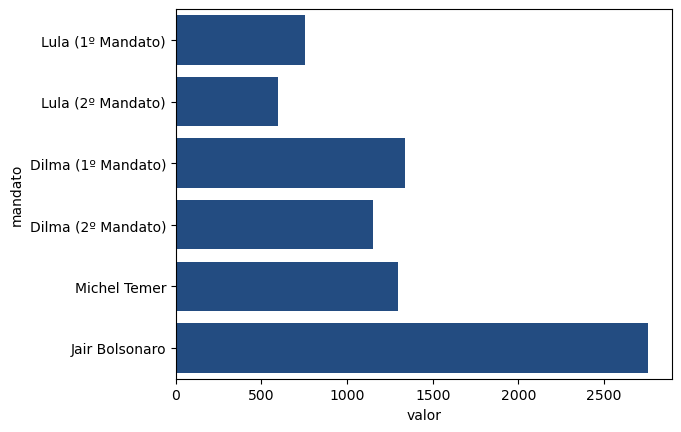

In [10]:
sns.barplot(
    y="mandato",
    x="valor",
    color="#134a91",
    estimator="mean",  # essa linha é opcional
    errorbar=None,
    data=cartoes,
)

Contudo, nem sempre queremos fazer gráficos monocromáticos! No geral, eles são uma boa ideia, mas podemos precisar de mais cores para:

1. Representar categorias diferentes
2. Destacar uma categoria específica (e.g. a categoria que estamos destacando em nosso texto)
3. Manter a coerência das categorias com outros gráficos

Nesses casos, precisamos utilizar o argumento `palette`.

Vamos definir as cores que queremos usar para cada forma de pagamento. Para isso, vamos passar uma lista de cores para o argumento `palette` e reintroduzir o `hue`.

Para montar essa lista, devemos passar a sequência de cores que desejamos usar separada por `,` entre colchetes (`[` e `]`). Podemos usar tanto os nomes das cores quanto os códigos hexadecimais. Vamos ajustar nosso gráfico para usar uma palheta de cores específica.

<Axes: xlabel='valor', ylabel='mandato'>

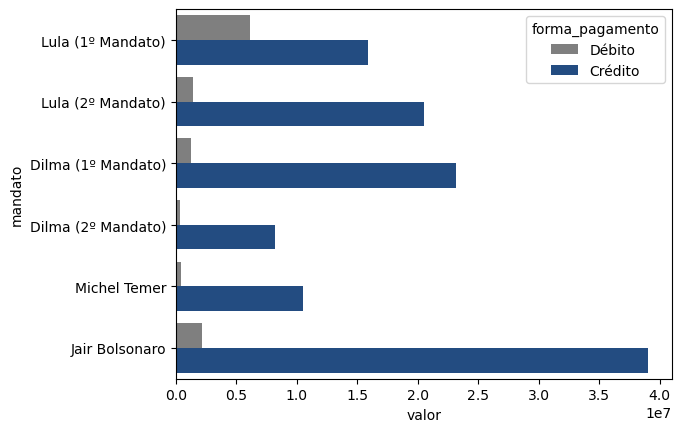

In [11]:
sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    palette=["tab:gray", "#134a91"],
    estimator="sum",
    errorbar=None,
    data=cartoes,
)

# Gráficos finais

Apenas para ilustração, vamos deixar aqui o código que usaríamos para criar um gráfico com todas as customizações que poderia ser incluído em um relatório ou artigo científico.

Não se preocupe em entender tudo o que é feito nesse código, pois vamos ver muitas dessas customizações adicionais ao longo do curso.

In [12]:
# Essas linhas criam configurações para as linhas de grade e deixam a legenda menos destacada em relação aos dados
plt.rcParams["axes.edgecolor"] = "lightgray"
plt.rcParams["ytick.color"] = "dimgrey"
plt.rcParams["xtick.color"] = "dimgrey"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams["axes.axisbelow"] = True

Primeiro, para o valor médio de transação por mandato destacando o valor no mandato de Bolsonaro:

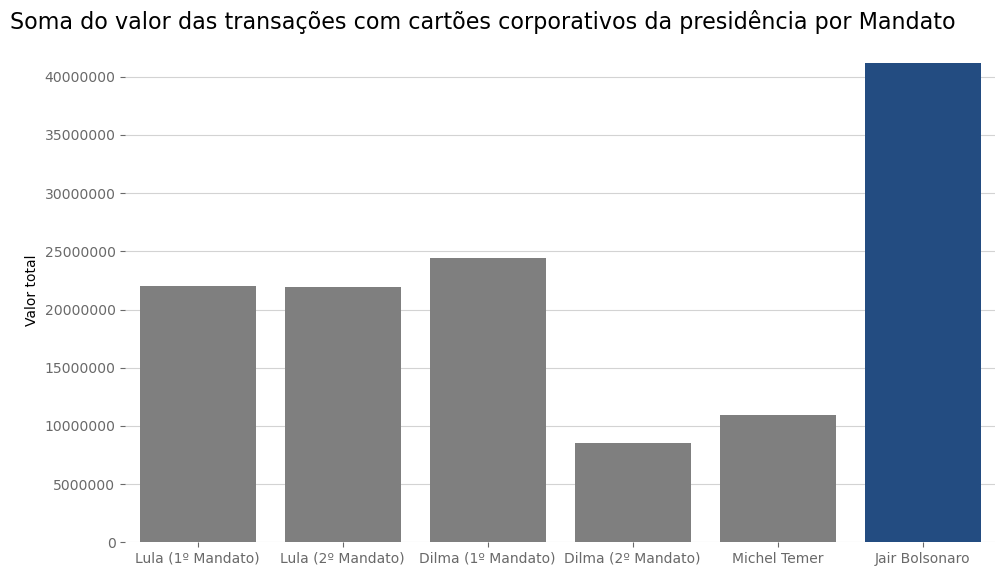

In [13]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# remove bordas do gráfico
sns.despine(left=True, bottom=True)

sns.barplot(
    x="mandato",
    y="valor",
    estimator="sum",
    errorbar=None,
    hue="mandato",
    palette={
        "Lula (1º Mandato)": "tab:gray",
        "Lula (2º Mandato)": "tab:gray",
        "Dilma (1º Mandato)": "tab:gray",
        "Dilma (2º Mandato)": "tab:gray",
        "Michel Temer": "tab:gray",
        "Jair Bolsonaro": "#134a91",
    },
    data=cartoes,
)

# remove notação científica
ax.get_yaxis().get_major_formatter().set_scientific(False)

# título
ax.set_title(
    "Soma do valor das transações com cartões corporativos da presidência por Mandato",
    loc="left",
    x=0,
    y=0.92,
    fontsize=16,
    transform=fig.transFigure,
)
# nome eixo y
ax.set_ylabel("Valor total")
# remove nome do eixo
ax.set_xlabel("")

plt.show()

Valor médio das transações por mandato e forma de pagamento:

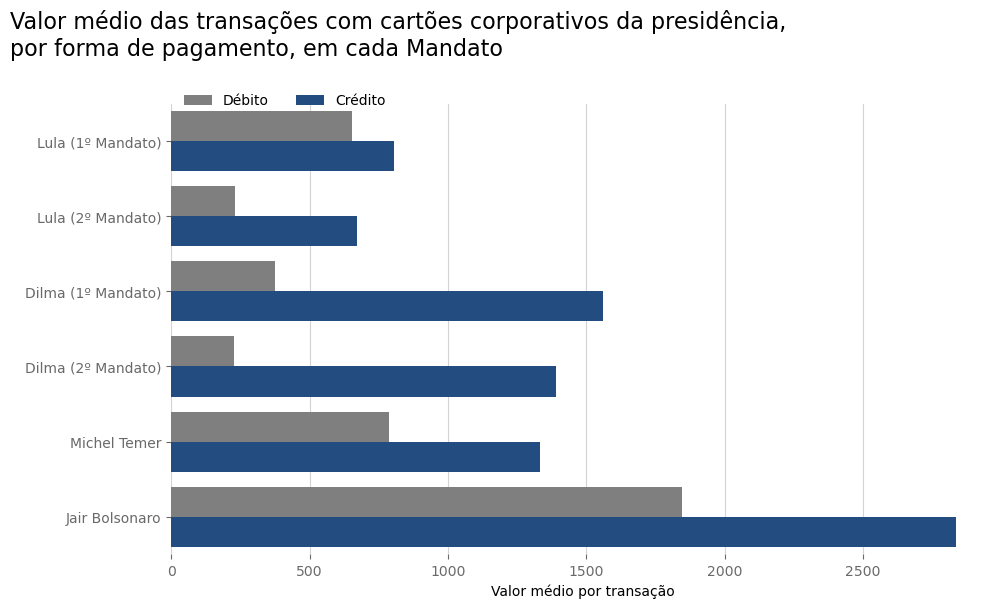

In [14]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# remove bordas do gráfico
sns.despine(left=True, bottom=True)

sns.barplot(
    y="mandato",
    x="valor",
    hue="forma_pagamento",
    estimator="mean",
    errorbar=None,
    palette={
        "Crédito": "#134a91",
        "Débito": "tab:gray",
    },
    data=cartoes,
)

# título
ax.set_title(
    "Valor médio das transações com cartões corporativos da presidência,\npor forma de pagamento, em cada Mandato",
    loc="left",
    fontsize=16,
    x=0,
    y=0.93,
    transform=fig.transFigure,
)
# nome eixo X
ax.set_xlabel("Valor médio por transação")
# remove nome do eixo Y
ax.set_ylabel("")

# ajusta legenda
ax.legend(
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    ncol=3,
)

plt.show()

/var/folders/7d/zkftk23n0wggn2fg8_pzyh540000gn/T/ipykernel_80446/3077897006.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x.get_text().replace(" (", "\n(")  for x in ax.get_xticklabels()])


[Text(0, 0, 'Lula\n(1º Mandato)'),
 Text(1, 0, 'Lula\n(2º Mandato)'),
 Text(2, 0, 'Dilma\n(1º Mandato)'),
 Text(3, 0, 'Dilma\n(2º Mandato)'),
 Text(4, 0, 'Michel Temer'),
 Text(5, 0, 'Jair Bolsonaro')]

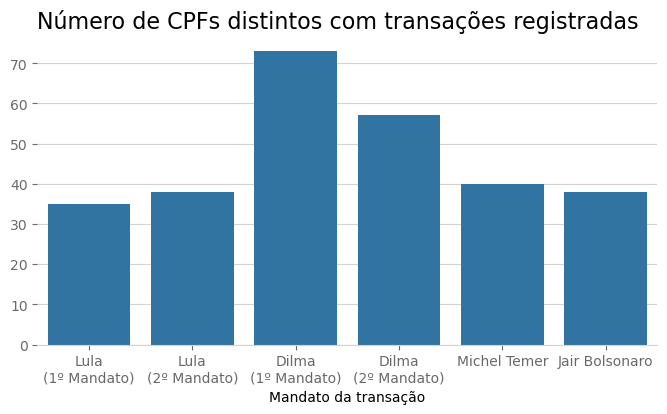

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.despine(left=True,)

# numero de cpfs por mandato
sns.barplot(
    data=cartoes.groupby("mandato", as_index=False, sort=False).agg(
        {"cpf_servidor": "nunique"}
    ),
    x="mandato",
    y="cpf_servidor",
    ax=ax,
)

ax.set_title("Número de CPFs distintos com transações registradas", loc="left", fontsize="16")
ax.set_ylabel("")
ax.set_xlabel("Mandato da transação")

ax.set_xticklabels([x.get_text().replace(" (", "\n(")  for x in ax.get_xticklabels()])